# SymPy
knihovna pro symbolickou matematiku

In [3]:
!python -m pip install sympy

Defaulting to user installation because normal site-packages is not writeable


In [1]:
#import sympy
from sympy import *

výpočty symbolické

In [3]:
import math
print("math:", math.sqrt(8))        # standardní funkce Pythonu
print("sympy:", sqrt(8))            # textový výsrup SymPy
print("latex:", latex(sqrt(8)))     # možnost exportu do textových editorů
sqrt(8)                             # grafický výstup SymPy

math: 2.8284271247461903
sympy: 2*sqrt(2)
latex: 2 \sqrt{2}


2*sqrt(2)

vyhodnocení výrazu

In [5]:
print(sqrt(8).evalf())
print(sqrt(8).evalf(3))         # na 3 platná čísla
print(pi)
print(pi.evalf(100))

2.82842712474619
2.83
pi
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068


### Desetinná čísla

In [12]:
print(1/2)
print(Rational(1, 2))           # racionální číslo
print(S(1)/2)                   # sympify (převádí objekt Pythonu na objekt SymPy)
Rational(1, 2)                  # grafický výstup

0.5
1/2
1/2


1/2

#### Definice proměnných
Symbol - nejdůležitější třída v SymPy
- základ pro symbolické výpočty (proměnné SymPy jsou objekty třídy Symbols)

Argument funkce Symbol() je řetězec obsahující symbol, který lze přiřadit proměnné
- proměnné musí být definovány pomocí symbols
- musí být definovány před použitím (jinak výjimka)

In [7]:
x = Symbol('x')         # nebo x = symbols('x')
x + 1/2

x + 0.5

- více proměnných oddělujeme mezerou nebo čárkou

In [21]:
x, y, z = symbols('x y z')      # oddělené čárkou nebo mezerou
z - 2*x + z                     # proměnné se seřadí automaticky

-2*x + 2*z

- můžeme definovat řecká písmena i indexy

In [22]:
alfa, psi, Psi = symbols("alpha psi Psi")   # řecká písmena
rs, rs2 = symbols("r_s, r_s^2")             # indexy
(alfa + Psi + psi) / (rs + rs2)

(Psi + alpha + psi)/(r_s + r_s^2)

Fungují i rozsahy - vrátí n-tici

In [11]:
print(symbols('a:5'))               # pod. jako range: 5 hodnot (0 až 4)
symbols('x(1:4)')                   # 1 až 3

(a0, a1, a2, a3, a4)


(x1, x2, x3)

Jiný způsob definování jednopísmenných proměnných
- pomocí modulu sympy.abc

In [9]:
from sympy.abc import u, v, w
u + 3*w - v

u - v + 3*w

#### Pojmenování výrazu a práce s ním

In [60]:
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [ ]:
expr + 1

x + 2*y + 1

In [ ]:
expr - x

2*y

In [61]:
expr * x

x*(x + 2*y)

Operace s výrazy

In [62]:
expr3 = sin(x)**2 + cos(x)**2 
simplify(expr3)                 # zjednodušení

1

Existují i další varianty zjednodušení:
- trigsimp (trigonometrické fce)
- powsimp (mocniny)
- combsimp (kombinatorika)

In [63]:
expr2 = expand(expr * x)        # roznásobení
expr2

x**2 + 2*x*y

In [64]:
factor(expr2)                   # převedení na součin

x*(x + 2*y)

In [67]:
expr4 = expr2*x
factor_list(expr4)              # dvojice konstanta a seznam činitelů s mocninami

(1, [(x, 2), (x + 2*y, 1)])

#### Nahrazení (substituce)
- nahrazení všech výskytů 
    - číslem
    - jinou proměnnou
    - jiným výrazem

In [20]:
nu, phi = symbols("nu phi")
expr = 5 + x + x**2
print(expr.subs(x, 2))      # nahrazení číslem
print(expr.subs(x, nu))     # nahrazení jinou proměnnou
expr.subs(x, sin(phi))      # nahrazení jiným výrazem

11
nu**2 + nu + 5


sin(phi)**2 + sin(phi) + 5

Číselné vyhodnocení výrazu 

In [29]:
r = symbols("r")
expr=pi*r**2 
print(expr)
print(expr.subs(r, 2))
print(expr.subs(r, 2).evalf())
print(expr.evalf(subs = {r:2}))

pi*r**2
4*pi
12.5663706143592
12.5663706143592


#### Funkce, integrace a derivace

In [28]:
#x, t, z, nu = symbols('x t z nu')
fce = sin(x) * exp(x)
fce

exp(x)*sin(x)

In [226]:
dce = diff(fce, x)          # nebo jen diff(fce)
dce

exp(x)*sin(x) + exp(x)*cos(x)

In [227]:
int = integrate(dce, x)     # nebo jen integrate(dce)
int

exp(x)*sin(x)

In [228]:
integrate(1/x, x)

log(x)

In [229]:
integrate(sin(x**2), (x, -oo, oo))  # určitý integrál

sqrt(2)*sqrt(pi)/2

Limity

In [230]:
limit(sin(x)/x, x, 0)                       # výpočet limity

1

In [49]:
limit(1/x, x, oo)                           # limita v nekonečnu

0

In [50]:

print(limit(1/x, x, 0))                     # limita zprava
print(limit(1/x, x, 0, dir="+"))            # totéž (limita zprava)
print(limit(1/x, x, 0, dir="+-"))           # limita (-> complex infinity)
print(limit(1/x, x, 0, dir="-"))            # limita zleva


oo
oo
zoo
-oo


### Rovnice

In [31]:
F = x**2 - 2            # výraz
F

x**2 - 2

řešením rozumíme položení rovnosti nule a hledání kořenů

In [34]:
print(solve(x**2 - 2, x))       # řešení rovnice x^2 - 2 = 0
print(solve(F, x))              # zápis pomocí pojmenovaného výrazu
print(solve(F))                 # zjednodušený zápis (jedna proměnná)

[-sqrt(2), sqrt(2)]
[-sqrt(2), sqrt(2)]
[-sqrt(2), sqrt(2)]


Rovnice s nenulovou pravou stranou

In [36]:
Eq(F, 5)

Eq(x**2 - 2, 5)

In [35]:
solve(Eq(F, 5))

[-sqrt(7), sqrt(7)]

#### Nedefinované funkce

In [235]:
f = Function('f')
f(x) + 1

f(x) + 1

Př.: Řešme obyčejnou diferenciální rovnici $y"− y = e^t$

In [39]:
y = Function('y')
t = Symbol('t')
# rovnice y′′− y = e^t
L = y(t).diff(t, t) - y(t)      # druhá derivace podle t (nebo diff(t, 2))     
R = exp(t)

print(solve(Eq(L, R), y(t)))    # pouze vyjádří y
dsolve(Eq(L, R), y(t))          # diferenciální rovnice

[-exp(t) + Derivative(y(t), (t, 2))]


Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

#### Matice

In [41]:
M = Matrix([[1, 2], [2, 2]]) 
M

Matrix([
[1, 2],
[2, 2]])

Hledání vlastních čísel a vlastních vektorů

In [44]:
print("Vlastní čísla:\n", M.eigenvals())
print("\nVlastní vektory:")
M.eigenvects()

Vlastní čísla:
 {3/2 - sqrt(17)/2: 1, 3/2 + sqrt(17)/2: 1}

Vlastní vektory:


[(3/2 - sqrt(17)/2,
  1,
  [Matrix([
   [-sqrt(17)/4 - 1/4],
   [                1]])]),
 (3/2 + sqrt(17)/2,
  1,
  [Matrix([
   [-1/4 + sqrt(17)/4],
   [                1]])])]

### Objekty, které se standardně nevyhodnocují

často nechceme ihned vypsat řešení, ale vypsat daný objekt

In [64]:
print(limit(sin(x)/x, x, 0))            # výpočet limity

L = Limit(sin(x)/x, x, 0, dir="+-")     # výpis objektu (limity)
print(L)                                # textový výstup
print(latex(L))                         # pro export do textových editorů
L                                       # grafický výstup

1
Limit(sin(x)/x, x, 0, dir='+-')
\lim_{x \to 0}\left(\frac{\sin{\left(x \right)}}{x}\right)


Limit(sin(x)/x, x, 0, dir='+-')

Vynucené vyhodnocení objektů 

In [66]:
L.doit()                                # provede výpočet

1

Derivace

In [240]:
fce = cos(x)**2
print(diff(fce))                        # provede derivaci

dce = Derivative(fce)                   # výpis derivace
dce

-2*sin(x)*cos(x)


Derivative(cos(x)**2, x)

Výpis nespecifikované funkce

In [53]:
x = Symbol('x')
f = Function('f')
g = Function('g')(x)                    # specifikována proměnná
print(f)
print(g)
g.diff(x)                               # nebo Derivative(g)

f
g(x)


Derivative(g(x), x)

Funkce více proměnných, parciální derivace

In [276]:
c, t = symbols('c t')
u = Function('u') (t, x)
L = Derivative(u, t, t)             # Derivative(f, (t, 2))
R = c**2 * Derivative(u, x, x)      # Derivative(f, (x, 2))
eq = Eq(L, R, evaluate = false)
eq

Eq(Derivative(u(t, x), (t, 2)), c**2*Derivative(u(t, x), (x, 2)))

In [303]:
x, y, sigma = symbols("x y sigma")
Phi = Function('Phi')(x, y, sigma)
def phi(x, y, sigma):
    return sqrt(x**2 + y**2 + sigma**2)

Eq(Derivative(phi(x, y, sigma), x), Derivative(Phi, x))

Eq(Derivative(sqrt(sigma**2 + x**2 + y**2), x), Derivative(Phi(x, y, sigma), x))

Integrace

In [62]:
print(integrate(cos(x)**2))             # provede integraci

F = Integral(cos(x)**2, (x, 0, pi))
print(latex(F))                         # pro import do textového editoru
F

x/2 + sin(x)*cos(x)/2
\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


Integral(cos(x)**2, (x, 0, pi))

In [60]:
a = Integral(cos(x)*exp(x), x)
print(a)
print(a.doit())
Eq(a, a.doit())

Integral(exp(x)*cos(x), x)
exp(x)*sin(x)/2 + exp(x)*cos(x)/2


Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

#### Vlastnosti

In [244]:
x = Symbol('x', real=True)

print(x.is_complex)
print(x.is_real)
print(x.is_rational)
print(x.is_positive)

True
True
None
None


In [245]:
x = Symbol('x', real=True)
expr = 1 + (x - 2)**2
expr

(x - 2)**2 + 1

In [246]:
print(expr.is_positive)
expr2 = expr.expand()
print(expr2.is_positive)
expr2

True
None


x**2 - 4*x + 5

Při definici symbolu s různými názvy jsou si oba rovny. Pokud ale mají rozdílné vlastnosti (assumptions), považují se za totožné

In [70]:
x1 = Symbol('x', positive=True)
x2 = Symbol('x')

print(x1, x2)
x1 == x2

x x


False

V některých případech výraz zjednodušit nejde

In [73]:
expr = exp(sqrt(x**2))
expr

exp(sqrt(x**2))

Funkce posify() nahradí všechny symboly ve výrazu symboly, které mají vlastnost positive=True (a slovník obsahující mapování)

In [77]:
posify(expr)

(exp(_x), {_x: x})

In [76]:
y = Symbol('y', positive=True)
sqrt(y**2)

y

Ke každému predikátu lze přistupovat prostřednictvím vlastnosti Q. 
- např. Q.even vrací predikát, zda argument je sudé číslo. 

In [37]:
print(ask(Q.algebraic(pi)))
print(ask(Q.complex(5-4*I)), ask( Q.complex(100)))

False
True True


In [47]:
x,y = symbols("x y") 
x,y = 5,10 
print(ask(Q.prime(x)), ask(Q.prime(y)))
print(ask(Q.composite(x)), ask(Q.composite(y)))
print(ask(Q.even(x)), ask(Q.even(y)))

True False
False True
False True


In [41]:
x,y = 2*I, 4+5*I 
print(ask(Q.imaginary(x)), ask(Q.imaginary(y)))

True False


In [43]:
x,y = 5,10 
print(ask(Q.even(x)), ask(Q.even(y)), ask(Q.odd(x)), ask(Q.odd(y)))

False True True False


In [45]:
x,y = 5,-5 
print(ask(Q.positive(x)), ask(Q.negative(y)))
print(ask(Q.rational(pi)), ask(Q.irrational(S(2)/3)))
ask(Q.zero(oo)), ask(Q.nonzero(I))


True True
False False


(False, False)

### Analýza textového řetězce

In [250]:
str = 'x**2 - 1'
expr = parse_expr(str)
expr

x**2 - 1

In [251]:
expr = parse_expr('x**2 - 1', {'x':Symbol('x', positive=True)})
expr

x**2 - 1

Spolupráce s numerickými knihovnami
- ve velkém rozsahu hodnot není funkce evalf() účinná

sympy.lambdify slouží k převodu symbolických výrazů na funkce, které lze vyhodnotit numericky

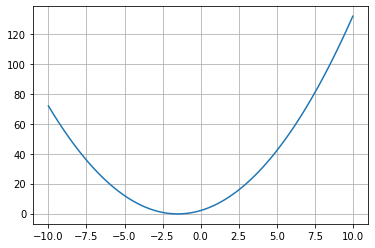

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')                 # Definice symbolu
expr = x**2 + 3*x + 2               # Definice symbolického výrazu

f = sp.lambdify(x, expr, 'numpy')   # Převod symbolického výrazu na funkci

x_vals = np.linspace(-10, 10, 100)  # Vytvoření hodnot x pro vykreslení grafu
y_vals = f(x_vals)                  # Vyhodnocení funkce pro dané hodnoty x

plt.plot(x_vals, y_vals)            # Vykreslení grafu pomocí matplotlib
plt.grid(True)
plt.show()


In [30]:
a, b = symbols('a b')
expr=a**2+b**2 
f=lambdify([a,b],expr)                  # do výrazu expr dosadí hodnoty a, b
f(2,3)

13

In [32]:
import numpy
f=lambdify([a,b],expr, "numpy")         # pro použití knihovny numpy
l1=numpy.arange(1,6) 
l2=numpy.arange(6,11) 
print(l1, l2)
f(l1,l2)

[1 2 3 4 5] [ 6  7  8  9 10]


array([ 37,  53,  73,  97, 125])

#### Kreslení grafů

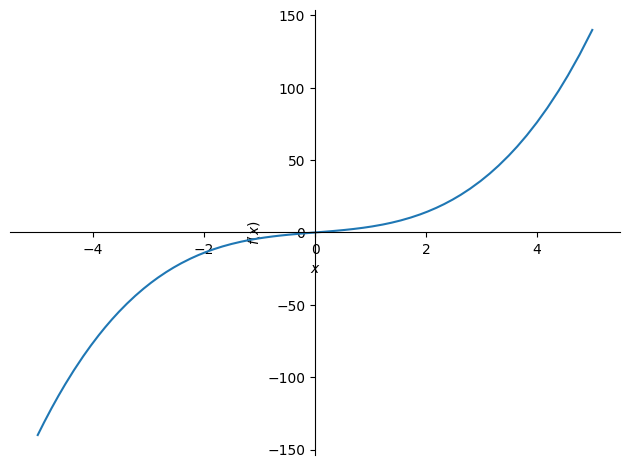

In [5]:
from sympy import *
x = symbols('x')
f = Function("f")
f = x**3 + 3*x
plotting.plot(f, (x,-5,5))